I implement Logistic Regression with Python and Scikit-Learn and build a classifier to predict whether or not it will rain tomorrow in Australia. I train a binary classification model using Logistic Regression. I have used the Rain in Australia dataset for this project.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weatherAUS.csv')

# Exploratory Data Analysis
Imported the data , now we are analysing the data

In [3]:
df.shape

(142193, 24)

We can see that 142193 samples and 24 features for each samples

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
columns = df.columns
columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

As it is mentioned in the dataset we can drop the risk_mm column , droping the column

In [6]:
df.drop(['RISK_MM'], axis = 1, inplace = True)

# Summary of Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

There are a lot of numerical and categorical columns. Also there are a lot of missing values

Statistics Properties of Dataset

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


For viewing properties of the categorical variables ; df.describe(include=['object'])

Explore RainTomorrow target variable

In [9]:
df['RainTomorrow'].isnull().sum()

0

It is clear that there are no null values in RainTomorrow, now for unique values

In [10]:
df.RainTomorrow.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df.RainTomorrow.nunique()

2

The np of unique values are two and values are No, Yes, now for the frequency distribution of RainTomorrow

In [12]:
df.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Percentage distribution of RainTomorrow

In [13]:
df.RainTomorrow.value_counts()/len(df)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

Visualising frequency distribution of RainTomorrow

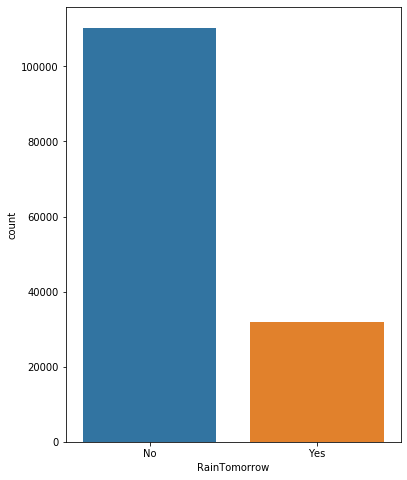

In [14]:
fig , ax = plt.subplots(figsize= (6,8))
ax = sns.countplot(x ='RainTomorrow', data = df)
plt.show()

# Exploring Categorical Variables

In [15]:
cat_var = [x for x in df.columns if df[x].dtype == 'object']

print(f'no of categorical varibales are {len(cat_var)} and the variables are :{cat_var}')

no of categorical varibales are 7 and the variables are :['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [16]:
df[cat_var].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


# Summary
1. There is a date column and six other categorical values
2. There are two binary categorical columns , RainToday and RainTomorrow, RainTomorrow is our target variable

# Missing values in Categorical Variables

In [17]:
df[cat_var].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [18]:
cat_missing = [x for x in cat_var if df[x].isnull().sum() !=0]

print(f'Categorical Variables with missing values :\n {df[cat_missing].isnull().sum()}')

Categorical Variables with missing values :
 WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


There are four categorical values with missing values , now for the frequency count of the categorical variables

In [19]:
for x in cat_var:
    print(df[x].value_counts())

2017-01-05    49
2014-08-06    49
2016-08-22    49
2014-01-07    49
2014-08-31    49
              ..
2007-11-15     1
2007-11-17     1
2008-01-30     1
2007-12-27     1
2008-01-02     1
Name: Date, Length: 3436, dtype: int64
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964

In [20]:
# Frequency Distribution of Categorical Values

for x in cat_var:
    print(df[x].value_counts()/len(df))

2017-01-05    0.000345
2014-08-06    0.000345
2016-08-22    0.000345
2014-01-07    0.000345
2014-08-31    0.000345
                ...   
2007-11-15    0.000007
2007-11-17    0.000007
2008-01-30    0.000007
2007-12-27    0.000007
2008-01-02    0.000007
Name: Date, Length: 3436, dtype: float64
Canberra            0.024038
Sydney              0.023468
Perth               0.022455
Darwin              0.022448
Hobart              0.022420
Brisbane            0.022230
Adelaide            0.021731
Bendigo             0.021337
Townsville          0.021330
AliceSprings        0.021316
MountGambier        0.021309
Ballarat            0.021295
Launceston          0.021295
Albany              0.021211
Albury              0.021175
MelbourneAirport    0.021161
PerthAirport        0.021161
Mildura             0.021147
SydneyAirport       0.021133
Nuriootpa           0.021112
Sale                0.021098
Watsonia            0.021091
Tuggeranong         0.021084
Portland            0.021070
Woomera   

The no of labels within a categorical variable: Cardinality . A high no of lables implies high cardinality. High Cardinality can have series problems with machine learning algorithms. Exploring high cardinal variables

In [21]:
# checking cardinality

for x in cat_var:
    print(f'Column {x} Number of labels : {len(df[x].unique())}')

Column Date Number of labels : 3436
Column Location Number of labels : 49
Column WindGustDir Number of labels : 17
Column WindDir9am Number of labels : 17
Column WindDir3pm Number of labels : 17
Column RainToday Number of labels : 3
Column RainTomorrow Number of labels : 2


The date column posess high cardinality . It needs to be preprocessed (feature Engineering)

In [22]:
df.Date.dtypes

dtype('O')

It is an object. Parsing the date into datetime format 

In [23]:
df.Date = pd.to_datetime(df.Date)

In [24]:
# Now for extracting the year
df['Year'] = df.Date.dt.year

In [25]:
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [26]:
# Extracting month and day
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df[['Month','Day']].head()

,Month,Day
0,12,1
1,12,2
2,12,3
3,12,4
4,12,5


In [27]:
# Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
Date             142193 non-null datetime64[ns]
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-n

We can drop the date column now

In [28]:
df.drop(['Date'],axis = 1, inplace = True)

In [29]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


The date column have been removed. Exploring Categorical variables one by one

In [30]:
cat_var = [x for x in df.columns if df[x].dtypes == 'O']

print(f'The categorical Variables are : {cat_var}')

The categorical Variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


There are six categorical variables once the date column is removed.Now for the missing values

In [31]:
df[cat_var].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

Exploring the Location Feature

In [32]:
df.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [33]:
# Lets do the one hot encoding for the Location Variable. We obtain k-1 dummy variables 

pd.get_dummies(df.Location,drop_first = True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Now for the other columns : WindGustDir
print(f'No of unique Values: {len(df.WindGustDir.unique())} and the unique values are {df.WindGustDir.unique()}')

No of unique Values: 17 and the unique values are ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']


In [35]:
# Frequency distribution of the WindGustDir
df.WindGustDir.value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

In [36]:
# Now onehot encoding add an additional dummy variable to indicate the nan values
pd.get_dummies(df.WindGustDir,drop_first = True, dummy_na = True)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142190,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
142191,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
# taking the sum to know how many values
pd.get_dummies(df.WindGustDir,drop_first = True, dummy_na = True).sum()

ENE    7992
ESE    7305
N      9033
NE     7060
NNE    6433
NNW    6561
NW     8003
S      8949
SE     9309
SSE    8993
SSW    8610
SW     8797
W      9780
WNW    8066
WSW    8901
NaN    9330
dtype: int64

Its clear that we have 9330 null values

# Explore WindDir9am 

In [38]:
# no of lables
print(f'No of labels : {len(df.WindDir9am.unique())}')
# the unique labels
print(f'The unique values are {df.WindDir9am.unique()}')
# the frequency count
print(df.WindDir9am.value_counts())

No of labels : 17
The unique values are ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64


In [39]:
# One hot encoding or WindDir9am
pd.get_dummies(df.WindDir9am,drop_first = True, dummy_na = True)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142189,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
142190,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
142191,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [40]:
# Now summing over the booleans
pd.get_dummies(df.WindDir9am,drop_first = True, dummy_na = True).sum()

ENE     7735
ESE     7558
N      11393
NE      7527
NNE     7948
NNW     7840
NW      8552
S       8493
SE      9162
SSE     8966
SSW     7448
SW      8237
W       8260
WNW     7194
WSW     6843
NaN    10013
dtype: int64

It contains 10013 nan values

In [41]:
# WindDir3pm

# no of lables
print(f'No of labels : {len(df.WindDir3pm.unique())}')
# the unique labels
print(f'The unique values are {df.WindDir3pm.unique()}')
# the frequency count
print(df.WindDir3pm.value_counts())

No of labels : 17
The unique values are ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64


In [42]:
# one hot encoding for the WindDir3pm, incuding the nan values as well
pd.get_dummies(df.WindDir3pm,drop_first = True, dummy_na = True)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142189,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142190,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
142191,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [43]:
# Summing over
pd.get_dummies(df.WindDir3pm,drop_first = True, dummy_na = True).sum()

ENE     7724
ESE     8382
N       8667
NE      8164
NNE     6444
NNW     7733
NW      8468
S       9598
SE     10663
SSE     9142
SSW     8010
SW      9182
W       9911
WNW     8656
WSW     9329
NaN     3778
dtype: int64

We can see that there are 3778 nan values

# Explore RainToday

In [44]:
# no of lables
print(f'No of labels : {len(df.RainToday.unique())}')
# the unique labels
print(f'The unique values are {df.RainToday.unique()}')
# the frequency count
print(df.RainToday.value_counts())

No of labels : 3
The unique values are ['No' 'Yes' nan]
No     109332
Yes     31455
Name: RainToday, dtype: int64


In [45]:
# one hot encoding including nan
pd.get_dummies(df.RainToday,drop_first = True, dummy_na = True)

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
142188,0,0
142189,0,0
142190,0,0
142191,0,0


In [46]:
# The no of booleans in each column
pd.get_dummies(df.RainToday,drop_first = True, dummy_na = True).sum()

Yes    31455
NaN     1406
dtype: int64

There are 1406 missing values in RainToday

# Exploring numerical values

In [47]:
num_var = [x for x in df.columns if df[x].dtypes !='O']
print(f'No of numerical features : {len(num_var)} \n The columns are \n{num_var}')

No of numerical features : 19 
 The columns are 
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [48]:
# View the numerical columns 
df[num_var].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


# Summary
1. There are 16 numerical features (excluding the year,month and day)
2. All the values are continuos type

# Missing values in numerical Features

In [49]:
df[num_var].isnull().sum() # Missing values

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

16 of the numerical columns have missing values

In [50]:
# Now for outliers of the numerical columns
print(round(df[num_var].describe(),2))

         MinTemp    MaxTemp   Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.00  141871.00  140787.00     81350.00  74377.00      132923.00   
mean       12.19      23.23       2.35         5.47      7.62          39.98   
std         6.40       7.12       8.47         4.19      3.78          13.59   
min        -8.50      -4.80       0.00         0.00      0.00           6.00   
25%         7.60      17.90       0.00         2.60      4.90          31.00   
50%        12.00      22.60       0.00         4.80      8.50          39.00   
75%        16.80      28.20       0.80         7.40     10.60          48.00   
max        33.90      48.10     371.00       145.00     14.50         135.00   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count     140845.00     139563.00    140419.00    138583.00    128179.00   
mean          14.00         18.64        68.84        51.48      1017.65   
std            8.89          8.80        19.05     

On closer insecption we can see that Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.

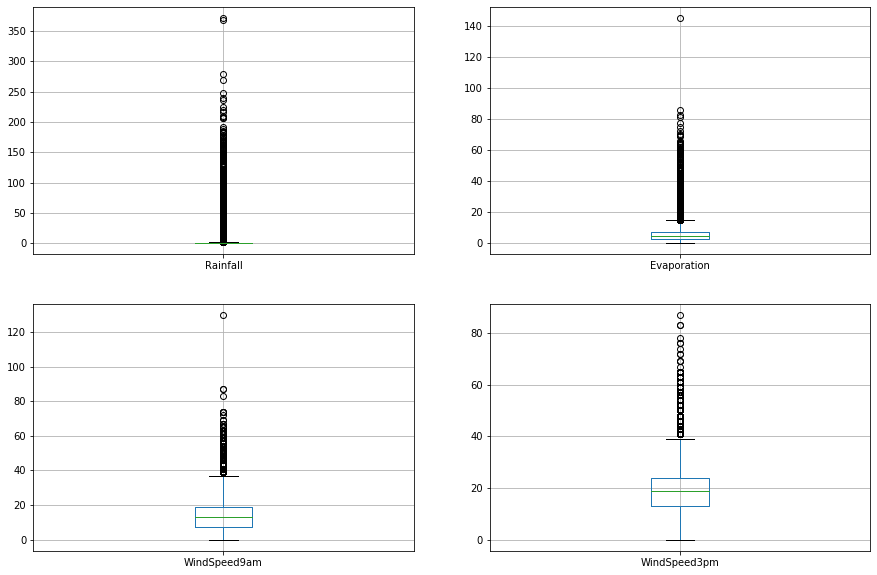

In [51]:
# Draw boxplots to visualise outliers

plt.figure(figsize= (15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_label('Rain Fall')

plt.subplot(2,2,2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_label('Evaporation')

plt.subplot(2,2,3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_label('WindSpeed9am')

plt.subplot(2,2,4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_label('WindSpeed3pm')

plt.show()

The box plots confirm that the aboove mentioned columns have outliers


# Check the distribution of Variable
1. plotting the histograms for checking whether it is normal or skewed distributions
2. if the variable is normal , follow the Extreme Value Analysis . In case of skewed , IQR(Intraquantile range)

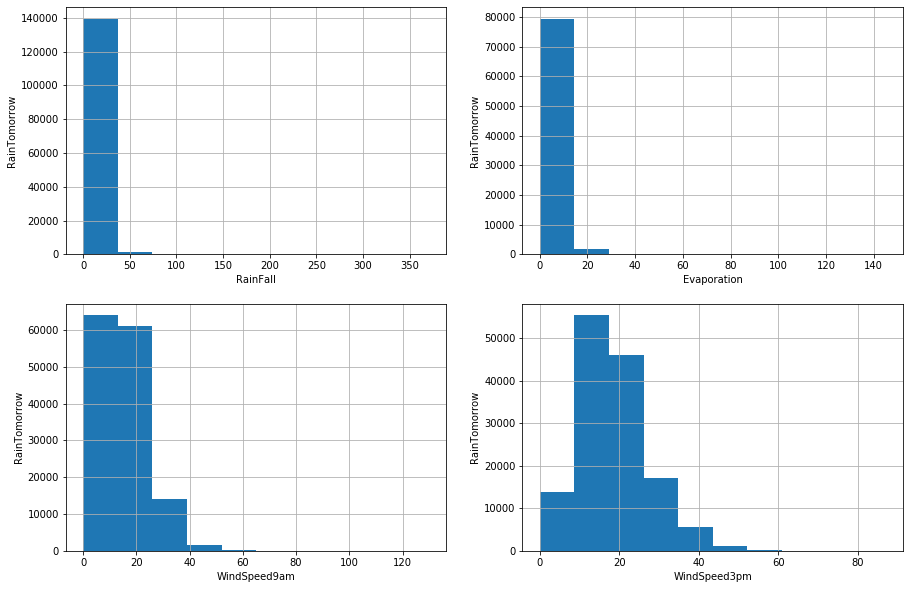

In [52]:
plt.figure(figsize= (15,10))

plt.subplot(2,2,1)
fig = df.Rainfall.hist(bins = 10)
fig.set_title('')
fig.set_xlabel('RainFall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

plt.show()

The distributions are skewed. Use interquantile range to find outliers.

In [53]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
lowerboundary = df.Rainfall.quantile(0.25) - (IQR * 3)
upperboundary = df.Rainfall.quantile(0.75) + (IQR * 3)
print(f'Rainfall outliers are values < {round(lowerboundary,3)} or > {upperboundary}')

Rainfall outliers are values < -2.4 or > 3.2


For Rainfall, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2

In [54]:
# Similarly find outliers for Evaporation,WindSpeed9am and WindSpeed3pm variables

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
lowerboundary = df.Evaporation.quantile(0.25) - (IQR * 3)
upperboundary = df.Evaporation.quantile(0.75) + (IQR * 3)
print(f'Evaporation outliers are values < {round(lowerboundary,3)} or > {round(upperboundary,3)}')

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
lowerboundary = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
upperboundary = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print(f'WindSpeed9am outliers are values < {round(lowerboundary,3)} or > {round(upperboundary,3)}')

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
lowerboundary = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
upperboundary = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print(f'WindSpeed3pm outliers are values < {round(lowerboundary,3)} or > {round(upperboundary,3)}')

Evaporation outliers are values < -11.8 or > 21.8
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


For Evaporation, the minimum and maximum values are 0.0 and 145.0. So, the outliers are values > 21.8.

For WindSpeed9am, the minimum and maximum values are 0.0 and 130.0. So, the outliers are values > 55.0

For WindSpeed3pm, the minimum and maximum values are 0.0 and 87.0. So, the outliers are values > 57.0

# Multivariate Analysis
1. An important step in EDA is to discover patterns and relationships between variables.

2. Heat map and pair plot to discover the patterns and relationships in the dataset.


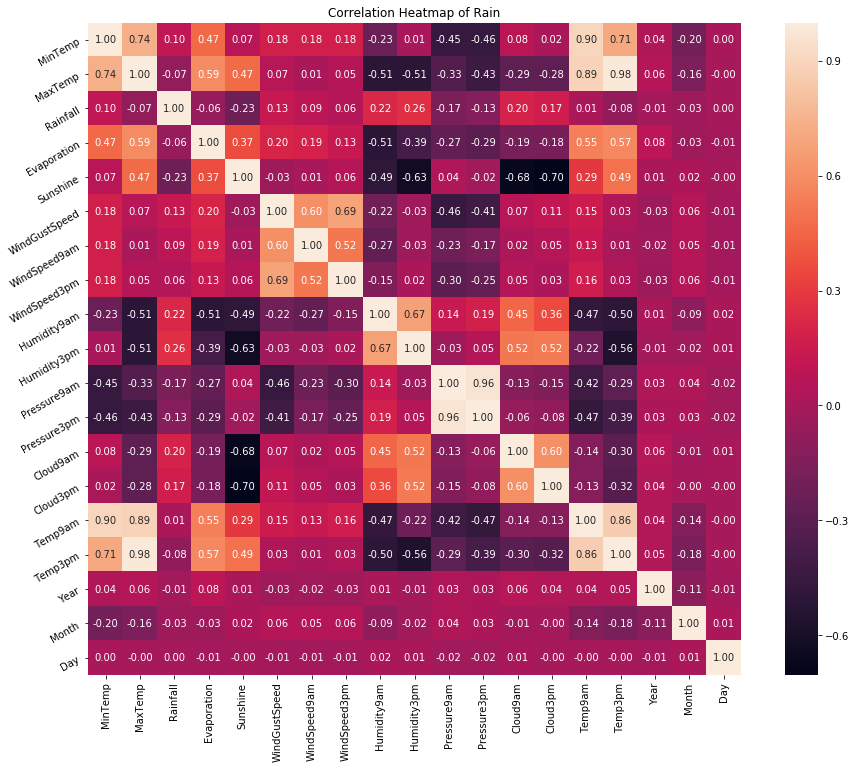

In [55]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain')
ax = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

From Heat Map;
1. MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74)
2. MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71)
3. MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90)
4. MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89)

5. MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98)

6. WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

7. Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

8. Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).

Pair Plot
Taking into consideration of highly psotively correlated


In [56]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

pair plot to show the correlation between these variables


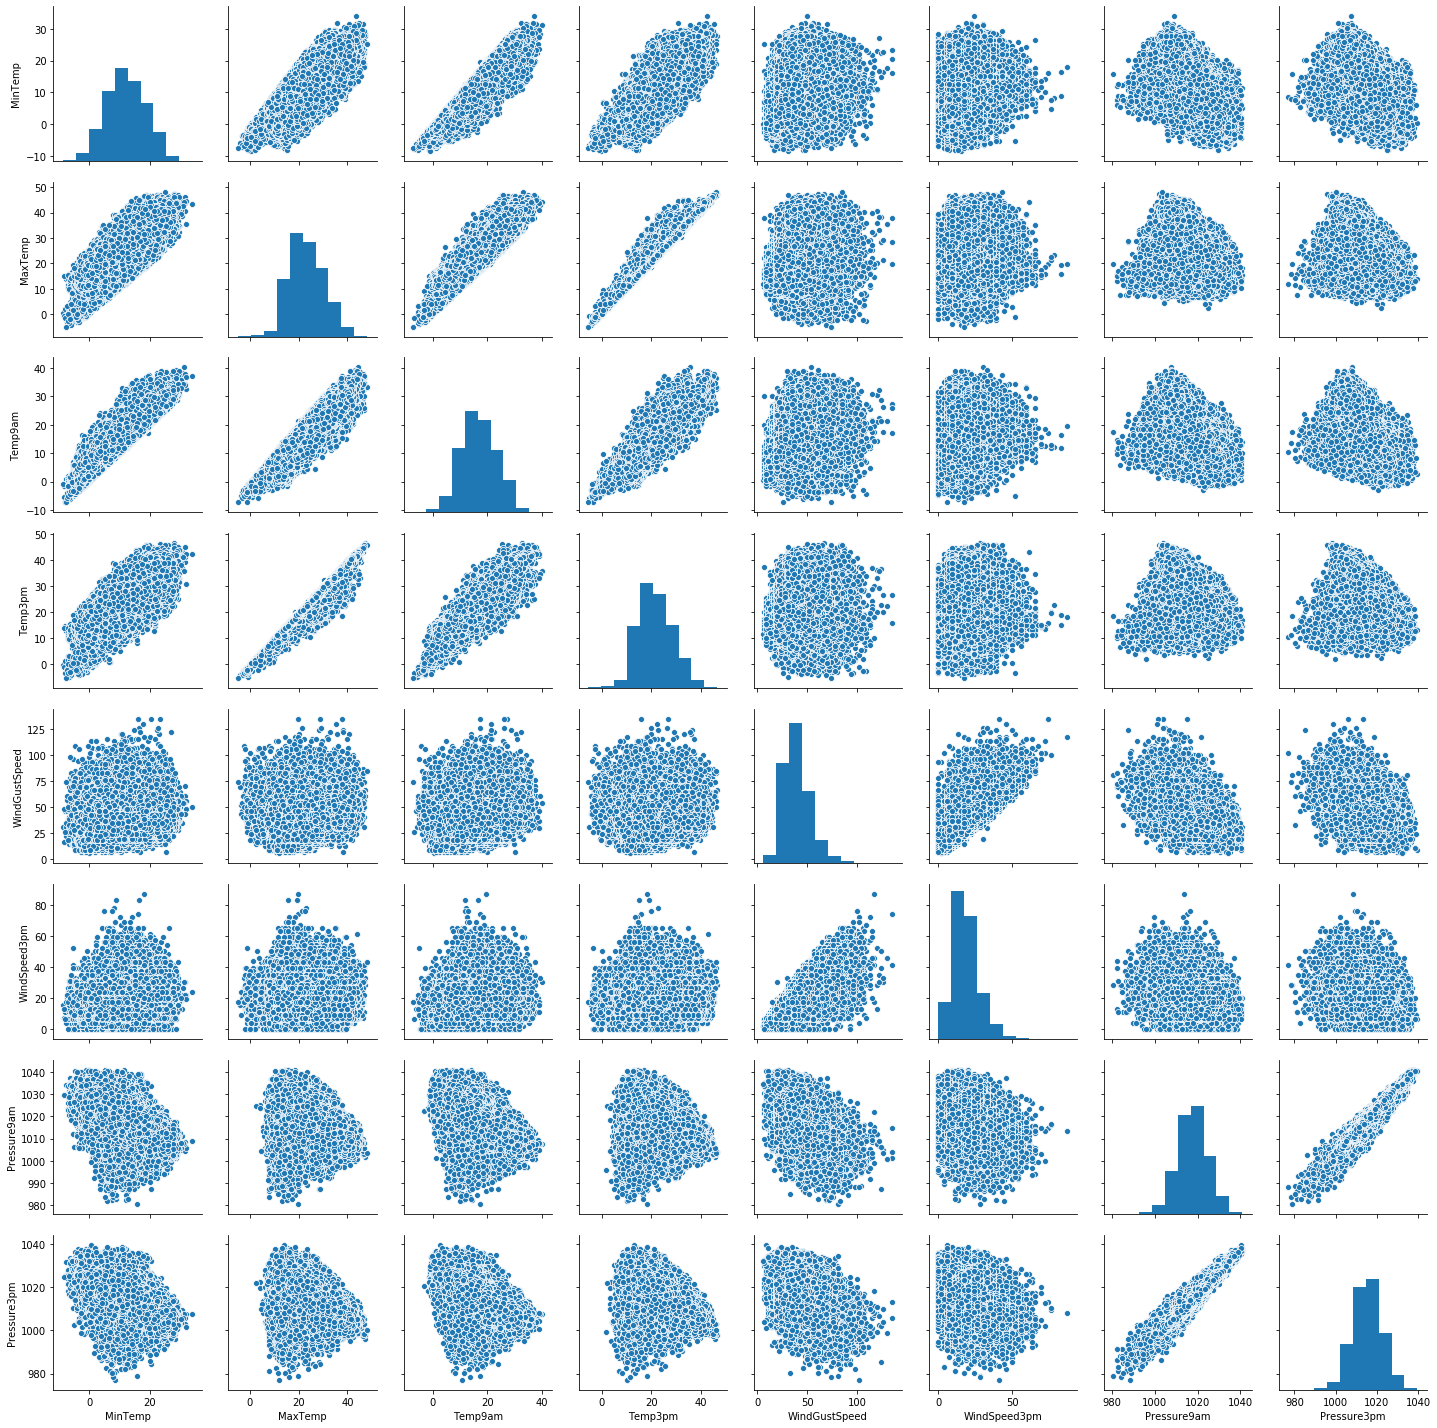

In [57]:
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()
# the plot show relationship between the values

In [58]:
# Declare feature vector and target variable
X = df.drop(['RainTomorrow'],axis = 1)
y = df['RainTomorrow']

In [59]:
# Splitting data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [60]:
# shape of x_train and x_test

X_train.shape,X_test.shape

((113754, 24), (28439, 24))

# Feature Engineering
Raw data is transformed into usefull information that will help to understand the model better and increase its predictive power.

In [61]:
# datatypes in X_train
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [62]:
# display categorical variables
cat_var = [cat for cat in  X_train.columns if X_train[cat].dtypes == 'O']
cat_var

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [63]:
# display numerical variables

num_var = [num for num in  X_train.columns if X_train[num].dtypes != 'O']
num_var

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

For the missing values in numerical variables


In [64]:
# the missing values in numerical cols in Xtrain
X_train[num_var].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
Year                 0
Month                0
Day                  0
dtype: int64

In [65]:
# missing values in numerical in xtest

X_test[num_var].isnull().sum()

MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustSpeed     1903
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
Year                 0
Month                0
Day                  0
dtype: int64

In [66]:
# percentage of missing values in numerical values in trainng set

for i in num_var:
    print(f' {i} : {round(df[i].isnull().sum()/df.shape[0],4)}') # can use .mean() also

 MinTemp : 0.0045
 MaxTemp : 0.0023
 Rainfall : 0.0099
 Evaporation : 0.4279
 Sunshine : 0.4769
 WindGustSpeed : 0.0652
 WindSpeed9am : 0.0095
 WindSpeed3pm : 0.0185
 Humidity9am : 0.0125
 Humidity3pm : 0.0254
 Pressure9am : 0.0986
 Pressure3pm : 0.0983
 Cloud9am : 0.3774
 Cloud3pm : 0.4015
 Temp9am : 0.0064
 Temp3pm : 0.0192
 Year : 0.0
 Month : 0.0
 Day : 0.0


Imputing can be done by assuming the data is missing random. Two types of imputation, mean or median imputation and the other is random sample imputation. Here i am using median since the median imputation is robust to outliers.
Imputation has to done in both training and test set. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.


In [67]:
#imput in xtrain and x_test with respect to median in X_train

for df1 in [X_train, X_test]:
    for col in num_var:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [68]:
# Checking for missing values

X_train[num_var].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [69]:
# for test set
X_test[num_var].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

Missing values in Categorical variables

In [70]:
# missing values in categorical column in x_train(average also ccan be used)
X_train[cat_var].isnull().sum()

Location          0
WindGustDir    7407
WindDir9am     7978
WindDir3pm     3008
RainToday      1139
dtype: int64

In [71]:
# imputing missing values with most frequent value

for df1 in [X_train, X_test]:
    df1['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df1['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df1['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df1['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [72]:
# checking missing values in categoricall variables

X_train[cat_var].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [73]:
# cheking missing in x_test
X_test[cat_var].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [74]:
# Checking overall missing values 
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64


All the missing values are imputed

Engineering outliers in numerical variavles

Already found out that Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns contain outliers.
To cap maximum values and remove outliers is used

In [75]:
def max_value(df1, variable, top):
    return np.where(df1[variable]>top, top, df1[variable])

for df1 in [X_train, X_test]:
    df1['Rainfall'] = max_value(df1, 'Rainfall', 3.2)
    df1['Evaporation'] = max_value(df1, 'Evaporation', 21.8)
    df1['WindSpeed9am'] = max_value(df1, 'WindSpeed9am', 55)
    df1['WindSpeed3pm'] = max_value(df1, 'WindSpeed3pm', 57)

In [76]:
X_train.Rainfall.max(),X_test.Rainfall.max()

(3.2, 3.2)

In [77]:
X_train[num_var].describe() # here we can see the outliers in those columns are capped

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,1017.640649,1015.241101,4.651801,4.703588,16.995062,21.688643,2012.759727,6.404021,15.710419
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,6.738680,6.675168,2.292726,2.117847,6.463772,6.855649,2.540419,3.427798,8.796821
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


## Encoding categorical values

In [78]:
# Viewing the categorical values

X_train[cat_var].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
110803,Witchcliffe,S,SSE,S,No
87289,Cairns,ENE,SSE,SE,Yes
134949,AliceSprings,E,NE,N,No
85553,Cairns,ESE,SSE,E,No
16110,Newcastle,W,N,SE,No


In [79]:
# RainToday Encoding
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [80]:
X_train.head() # New features havebeen created RainToday_1 and RainToday_0

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
110803,Witchcliffe,13.9,22.6,0.2,4.8,8.5,S,41.0,SSE,S,...,1013.4,5.0,5.0,18.8,20.4,0,1,2014,4,25
87289,Cairns,22.4,29.4,2.0,6.0,6.3,ENE,33.0,SSE,SE,...,1013.1,7.0,5.0,26.4,27.5,1,0,2015,11,2
134949,AliceSprings,9.7,36.2,0.0,11.4,12.3,E,31.0,NE,N,...,1013.6,1.0,1.0,28.5,35.0,0,1,2014,10,19
85553,Cairns,20.5,30.1,0.0,8.8,11.1,ESE,37.0,SSE,E,...,1010.8,2.0,3.0,27.3,29.4,0,1,2010,10,30
16110,Newcastle,16.8,29.2,0.0,4.8,8.5,W,39.0,N,SE,...,1015.2,5.0,8.0,22.2,27.0,0,1,2012,11,8


In [81]:
# Enoding categorical variables and concatinating the entire result set

X_train = pd.concat([X_train[num_var],X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [82]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
110803,13.9,22.6,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,...,0,0,1,0,0,0,0,0,0,0
87289,22.4,29.4,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,...,0,0,0,1,0,0,0,0,0,0
134949,9.7,36.2,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,...,0,0,0,0,0,0,0,0,0,0
85553,20.5,30.1,0.0,8.8,11.1,37.0,22.0,19.0,59.0,53.0,...,0,0,0,0,0,0,0,0,0,0
16110,16.8,29.2,0.0,4.8,8.5,39.0,0.0,7.0,72.0,53.0,...,0,0,0,1,0,0,0,0,0,0


In [83]:
# For the test case as well

X_test = pd.concat([X_test[num_var], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [84]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
86232,17.4,29.0,0.0,3.6,11.1,33.0,11.0,19.0,63.0,61.0,...,0,0,0,0,0,0,0,0,0,0
57576,6.8,14.4,0.8,0.8,8.5,46.0,17.0,22.0,80.0,55.0,...,0,0,1,0,0,0,0,0,0,0
124071,10.1,15.4,3.2,4.8,8.5,31.0,13.0,9.0,70.0,61.0,...,0,0,0,0,1,0,0,0,0,0
117955,14.4,33.4,0.0,8.0,11.6,41.0,9.0,17.0,40.0,23.0,...,0,0,0,0,0,0,1,0,0,0
133468,6.8,14.3,3.2,0.2,7.3,28.0,15.0,13.0,92.0,47.0,...,0,0,0,0,0,0,0,0,0,0


Now we have to scale the features so that all the features are of the same scale

In [85]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
cols = X_train.columns

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [89]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [90]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.484406,0.530004,0.210962,0.236312,0.554562,0.262667,0.254148,0.326575,0.688675,0.515095,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,0.151741,0.134105,0.369949,0.129528,0.190999,0.101682,0.160119,0.152384,0.189356,0.205307,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375297,0.431002,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.479810,0.517958,0.000000,0.220183,0.586207,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.593824,0.623819,0.187500,0.247706,0.600000,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


x_train dataset can now be fed into Logistic Regression Classifier

In [91]:
#Model Training
from sklearn.linear_model import LogisticRegression

# instantiate the model
log_reg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the results

In [92]:
y_pred_test = log_reg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

predict_proba method provides the probablities for the target value

In [93]:
# probability of getting output as 0 - no rain

log_reg.predict_proba(X_test)[:,0]

array([0.91387289, 0.83563009, 0.82035841, ..., 0.9767403 , 0.79853008,
       0.30734037])

In [94]:
# probability of getting output as 1 - rain

log_reg.predict_proba(X_test)[:,1]

array([0.08612711, 0.16436991, 0.17964159, ..., 0.0232597 , 0.20146992,
       0.69265963])

In [95]:
# To check the accuracy
from sklearn.metrics import accuracy_score

print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test),4)}')# y_test are the true class labels and y_pred_test are predicted labels

Model accuracy score: 0.8501


In [96]:
# Compare the train-set and test-set accuracy 
y_pred_train = log_reg.predict(X_train)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [97]:
print(f'Training-set accuracy score: {round(accuracy_score(y_train, y_pred_train),4)}')

Training-set accuracy score: 0.8476


We need to check for overfitting and underfitting

In [98]:
# print the scores on training and test set

print(f'Training set score: {round(log_reg.score(X_train, y_train),4)}')

print(f'Test set score: {round(log_reg.score(X_test, y_test),4)}')

Training set score: 0.8476
Test set score: 0.8501


Since the both of the values are quiet comparable , notion of overfitting can be avoided

In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 85% accuracy on both the training and the test set. But the model performance on both the training and test set are very comparable. It is likely the case of underfitting.

I will increase C and fit a more flexible model.

In [99]:
# fit the Logsitic Regression model with C=100

# instantiate the model
log_reg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
log_reg100.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
# print the scores on training and test set

print(f'Training set score: {round(log_reg100.score(X_train, y_train),4)}')

print(f'Test set score: {round(log_reg100.score(X_test, y_test),4)}')

Training set score: 0.8478
Test set score: 0.8505


For C = 100, slightly increased train accuracy and a highr test accuracy. Implies that a more complex model provide better accuracy.

Now lets check more regularized model than the default value, c = 0.01

In [101]:
# fit the Logsitic Regression model with C=001

# instantiate the model
log_reg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
log_reg001.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
# print the scores on training and test set

print(f'Training set score: {round(log_reg001.score(X_train, y_train),4)}')

print(f'Test set score: {round(log_reg001.score(X_test, y_test),4)}')

Training set score: 0.8409
Test set score: 0.8448


Both of accuracies reduce as we use more regulazied model

### Null Accuracy
Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [103]:
# check class distribution in test set

y_test.value_counts()

No     22067
Yes     6372
Name: RainTomorrow, dtype: int64

we can calculate null accuracy by dividing 22067 by total number of occurences.

In [104]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print(f'Null accuracy score: {round(null_accuracy,4)}')

Null accuracy score: 0.7759


Based on null accuracy we can say that our model is predicting well

# Confusion Matrix
A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below

In [105]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20892  1175]
 [ 3087  3285]]

True Positives(TP) =  20892

True Negatives(TN) =  3285

False Positives(FP) =  1175

False Negatives(FN) =  3087


The confusion matrix shows 20892 + 3285 = 24177 correct predictions and 3087 + 1175 = 4262 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 20892
True Negatives (Actual Negative:0 and Predict Negative:0) - 3285
False Positives (Actual Negative:0 but Predict Positive:1) - 1175 (Type I error)
False Negatives (Actual Positive:1 but Predict Negative:0) - 3087 (Type II error)

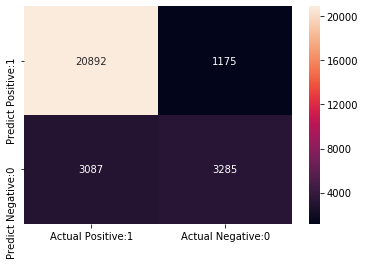

In [106]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d')
plt.show()

Classification Report

Displaying the precision, recall, f1 and support scores for the model

In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22067
         Yes       0.74      0.52      0.61      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439



#### Classification Accuracy

In [108]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [109]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print(f'Classification accuracy : {classification_accuracy}')

Classification accuracy : 0.8501353774745948


#### Classification Error

In [110]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(f'Classification error : {classification_error}')

Classification error : 0.14986462252540525


#### Precision 
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

In [111]:
# print precision

precision = TP / float(TP + FP)
print('Precision :',precision)

Precision : 0.9467530701953143


#### Sensitivity
identifies the proportion of correctly predicted actual positives.
given as the ratio of TP to (TP + FN)
It is similar to true_positive_rate and is also called recall

In [112]:
# print sensitivity
sensitivity = TP/float(TP+FN)
print('Sensitivity :',sensitivity)

Sensitivity : 0.8712623545602403


In [113]:
#### False Positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive rate :',false_positive_rate)

False Positive rate : 0.26345291479820626


In [114]:
# Specificity
specificity = TN / (TN + FP)
print('Specificity :',specificity)

Specificity : 0.7365470852017937


#### f1-score 
f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0.
#### support
the actual number of occurrences of the class in our dataset.

## Adjusting the threshold level

In [115]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = log_reg.predict_proba(X_test)[0:10]
y_pred_prob

array([[0.91387289, 0.08612711],
       [0.83563009, 0.16436991],
       [0.82035841, 0.17964159],
       [0.99025907, 0.00974093],
       [0.95726777, 0.04273223],
       [0.97994263, 0.02005737],
       [0.17838842, 0.82161158],
       [0.23482286, 0.76517714],
       [0.9005084 , 0.0994916 ],
       [0.85480271, 0.14519729]])

### Observations
In each row, the numbers sum to 1.
There are 2 columns which correspond to 2 classes - 0 and 1.

Class 0 - predicted probability that there is no rain tomorrow.
Class 1 - predicted probability that there is rain tomorrow.

#### Importance of predicted probabilities

We can rank the observations by probability of rain or no rain.
predict_proba process

Predicts the probabilities
Choose the class with the highest probability
Classification threshold level
There is a classification threshold level of 0.5.
Class 1 - probability of rain is predicted if probability > 0.5.
Class 0 - probability of no rain is predicted if probability < 0.5

In [116]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])
y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.913873,0.086127
1,0.835630,0.164370
2,0.820358,0.179642
3,0.990259,0.009741
4,0.957268,0.042732
5,0.979943,0.020057
6,0.178388,0.821612
7,0.234823,0.765177
8,0.900508,0.099492
9,0.854803,0.145197


In [117]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

log_reg.predict_proba(X_test)[0:10, 1]

array([0.08612711, 0.16436991, 0.17964159, 0.00974093, 0.04273223,
       0.02005737, 0.82161158, 0.76517714, 0.0994916 , 0.14519729])

In [118]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = log_reg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

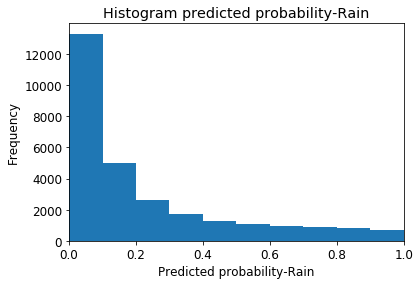

In [121]:
# plot histogram of predicted probabilities

# adjust the font size 
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)
plt.title('Histogram predicted probability-Rain')
plt.xlim(0,1)
plt.xlabel('Predicted probability-Rain')
plt.ylabel('Frequency')

#### Observations
The probability distribution is skewed. Most of the probabilities predict there will be no rain tomorrow

In [122]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    
    cm1=0
    y_pred1 = log_reg.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    y_pred2 = binarize(y_pred1, i/10)
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    cm1 = confusion_matrix(y_test, y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
            'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
            'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
            'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
            )

With 0.1 threshold the Confusion Matrix is  

 [[12726  9341]
 [  547  5825]] 

 with 18551 correct predictions,  

 9341 Type I errors( False Positives),  

 547 Type II errors( False Negatives),  

 Accuracy score:  0.6523084496641935 

 Sensitivity:  0.9141556811048337 

 Specificity:  0.5766982371867494 


With 0.2 threshold the Confusion Matrix is  

 [[17066  5001]
 [ 1233  5139]] 

 with 22205 correct predictions,  

 5001 Type I errors( False Positives),  

 1233 Type II errors( False Negatives),  

 Accuracy score:  0.7807939800977531 

 Sensitivity:  0.806497175141243 

 Specificity:  0.7733720034440568 


With 0.3 threshold the Confusion Matrix is  

 [[19080  2987]
 [ 1873  4499]] 

 with 23579 correct predictions,  

 2987 Type I errors( False Positives),  

 1873 Type II errors( False Negatives),  

 Accuracy score:  0.8291079151868912 

 Sensitivity:  0.7060577526679221 

 Specificity:  0.8646395069560883 


With 0.4 threshold the Confusion Matrix is  

 [[20191  1876]
 

#### Comments
In binary problems, the threshold of 0.5 is used as default to convert predicted probabilities into class predictions.
Threshold can be adjusted to increase sensitivity or specificity.
Sensitivity and specificity have an inverse relationship.
We can see that increasing the threshold level results in increased accuracy.
Adjusting the threshold level should be one of the last step you do in the model-building process.

#### ROC Curve
Tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

Focusing on TPR and FPR of a single point provides as with the general performance of the ROC curve at various threshold levels.When the threshold is lower , we classify more items as positive. Implies an increase in True positives and false positives

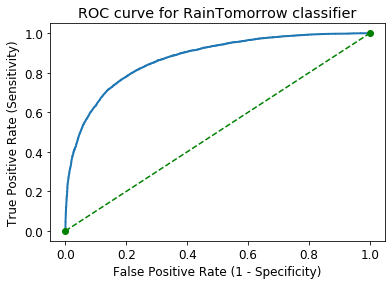

In [131]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'go--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

#### ROC AUC
ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. A technique to compare classifier performance. We measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5

In [132]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8729


ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not. Higher the value better the classifier performance.

In [134]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8695


#### Model evaluation and improvement
To improve the model performance these techniques are implemented : recursive feature elimination, k-fold cross validation and hyperparameter optimization using GridSearchCV.

#### Recursive Feature Elimination with cross validation
Removes the least useful predictor and build the model again. This process is repeated until all the unimportant features are removed from the model.
Recursive Feature Elimination with Cross-Validated (RFECV) feature selection technique selects the best subset of features for the estimator by removing 0 to N features iteratively using recursive feature elimination. Then it selects the best subset based on the accuracy or cross-validation score or roc-auc of the model. Recursive feature elimination technique eliminates n features from a model by fitting the model multiple times and at each step, removing the weakest features

In [136]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=log_reg, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)

In [138]:
print('Optimal number of features :',rfecv.n_features_)

Optimal number of features : 112


In [139]:
# transform the training data
X_train_rfecv = rfecv.transform(X_train)

# train classifier
log_reg.fit(X_train_rfecv, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
# test classifier on test data

X_test_rfecv = rfecv.transform(X_test)
y_pred_rfecv = log_reg.predict(X_test_rfecv)

In [142]:
# print mean accuracy on transformed test data and labels

print (f'Classifier score: {round(log_reg.score(X_test_rfecv,y_test),4)}')

Classifier score: 0.85


Obtain a similar accurace with less number or optimal set featuresb

#### k-Fold cross Validation

In [143]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_train, y_train, cv = 5, scoring='accuracy')
print(f'Cross-validation scores:{scores}')

# compute Average cross-validation score
print(f'Average cross-validation score: {round(scores.mean(),4)}')

Cross-validation scores:[0.84690783 0.84624852 0.84633642 0.84963298 0.84773626]
Average cross-validation score: 0.8474


We can conclude that K-fold cross validation doesnot result in performance improvement

#### Hyperparameter Optimization using GridSearch CV

In [144]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]

grid_search = GridSearchCV(estimator = log_reg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [145]:
# best score achieved during the GridSearchCV
print(f'GridSearch CV best score : {round(grid_search.best_score_,4)}')

# print parameters that give the best results
print('Parameters that give the best results :',grid_search.best_params_)

# print estimator that was chosen by the GridSearch
print('Estimator that was chosen by the search :',grid_search.best_estimator_)

GridSearch CV best score : 0.8474
Parameters that give the best results : {'penalty': 'l1'}
Estimator that was chosen by the search : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [146]:
# calculate GridSearch CV score on test set

print(f'GridSearch CV score on test set: {round(grid_search.score(X_test, y_test),4)}')

GridSearch CV score on test set: 0.8507


It is clear that the gridsearch cv provides better result

### Results and Conclusion 
1. The logistic regression model accuracy score is 0.8501. So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.

2. Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.

3. The model shows no signs of overfitting.

4. Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

5. Increasing the threshold level results in increased accuracy.

6. ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

7. Our original model accuracy score is 0.8501 whereas accuracy score after RFECV is 0.8500. So, we can obtain approximately similar accuracy but with reduced set of features.

8. Our original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.

9. Our original model test accuracy is 0.8501 while GridSearch CV accuracy is 0.8507. We can see that GridSearch CV improve the performance for this particular model.